# 02_tml_baseline

We will use the train/test data generated from *00_create_dataset.ipynb* and use basic machine learning models to generate a baseline reference of model performance on our data. We will then decide on how to improve the various models after this

In [ ]:
''' data and math '''
import pandas as pd
import numpy as np

''' plotting images '''
from matplotlib import pyplot as plt
%matplotlib inline

''' traversing directories '''
import os
from pathlib import Path

''' utilities '''
from tqdm import tqdm

''' metrics '''
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
''' used to reference the root directory, for directory traversal ''' 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
mount_dir = '/content/gdrive'
root_dir = Path('/content/gdrive/My Drive/it3011_project')

Mounted at /content/gdrive


# Loading data

In [ ]:
# load data
train = pd.read_csv(root_dir/"data/train.csv")
test = pd.read_csv(root_dir/"data/test.csv")
print("data loaded")

data loaded


In [ ]:
# check shape
print(train.shape)
print(test.shape)

(280145, 138)
(120504, 138)


In [ ]:
# create train/test sets
features = [feature for feature in test.keys() if "feature" in feature]
x_train = train.loc[:, features].values
y_train = train.loc[:,['action']].values.flatten()
x_test = test.loc[:, features].values
y_test = test.loc[:,['action']].values.flatten()
print("train/test set created")

train/test set created


In [ ]:
# scaling data to make it easier for models to train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# test set scaled on the same scaler as train, because models are fitted on the train distributions and not test distributions
x_test = scaler.transform(x_test)

# Helper functions

In [ ]:
# constants
SEED = 42

In [ ]:
# create the utility score, which takes in the prediction value and the ground truth action and generates a score
# link: https://www.kaggle.com/c/jane-street-market-prediction/overview/evaluation

# data: original train/test data    action: the y-value. can either be y_pred or original values too, if we want the max score attainable
def utility_score(data, action): 
  dates_set = set(data.date.values)
  dates = data.loc[:, ['date']].values.flatten()
  weights = data.loc[:, ['weight']].values.flatten()
  resps = data.loc[:, ['resp']].values.flatten()
  actions = action.flatten()

  i = len(dates_set)
  p_i = []

  for date in dates_set:
    indices = np.where(dates == date)[0]
    p_i_temp = 0
    for j in indices:
      p_i_temp = p_i_temp + weights[j] * resps[j] * actions[j]
    p_i.append(p_i_temp)
  
  p_i_squared = [p_i1*p_i2 for p_i1,p_i2 in zip(p_i,p_i)]
  t = ( sum(p_i) / np.sqrt(sum(p_i_squared)) ) * np.sqrt(250/i)
  u = min(max(t, 0), 6) * sum(p_i)

  return u

def max_train_utility_score(data=train, action=y_train):
  return utility_score(data, action)

def max_test_utility_score(data=test, action=y_test):
  return utility_score(data, action)

In [ ]:
def model_scores(model, test=test, x_test=x_test, y_test=y_test):
  y_pred = model.predict(x_test) 

  print("Utility score: ", utility_score(test, y_pred))
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  
  print("Confusion matrix")
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(3, 3))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
  plt.show()  

  print("AUC_ROC")
  logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

# Decision Tree

In [ ]:
# import model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# settings to vary
max_depths = [2,4,8,16,32,64]
splitters = ['best', 'random']
max_features = [None, 'sqrt', 'log2']



Decision Tree model: max_depth=2, splitter=best, max_feature=None
Utility score:  251.64090481623242
Accuracy:  0.5003485361481776
Confusion matrix


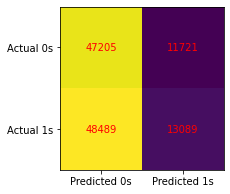

AUC_ROC


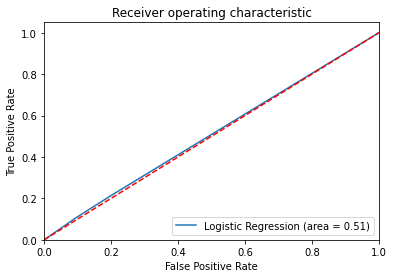



Decision Tree model: max_depth=2, splitter=best, max_feature=sqrt
Utility score:  174.3472043721208
Accuracy:  0.5080329283675231
Confusion matrix


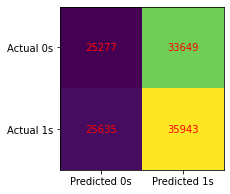

AUC_ROC


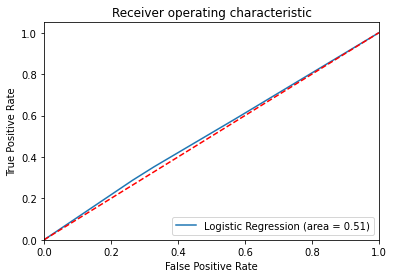



Decision Tree model: max_depth=2, splitter=best, max_feature=log2
Utility score:  137.1539610722582
Accuracy:  0.5044396866494059
Confusion matrix


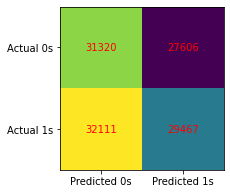

AUC_ROC


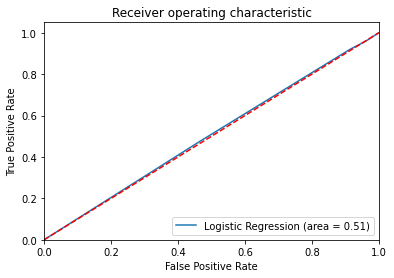



Decision Tree model: max_depth=2, splitter=random, max_feature=None
Utility score:  196.9836872901692
Accuracy:  0.5072196773551085
Confusion matrix


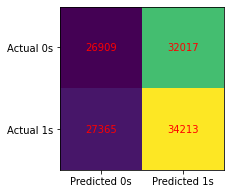

AUC_ROC


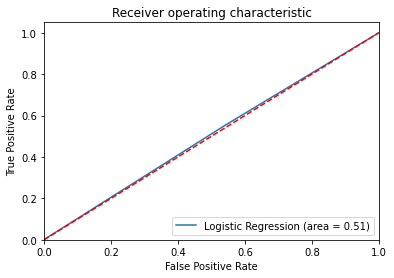



Decision Tree model: max_depth=2, splitter=random, max_feature=sqrt
Utility score:  -0.0
Accuracy:  0.5110037841067516
Confusion matrix


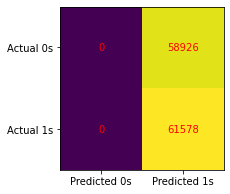

AUC_ROC


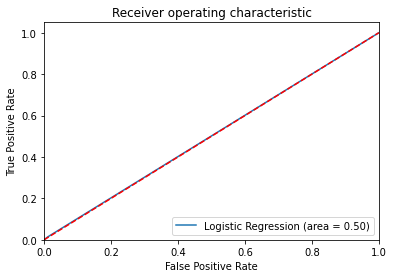



Decision Tree model: max_depth=2, splitter=random, max_feature=log2
Utility score:  -0.0
Accuracy:  0.5110037841067516
Confusion matrix


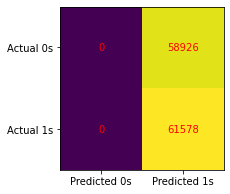

AUC_ROC


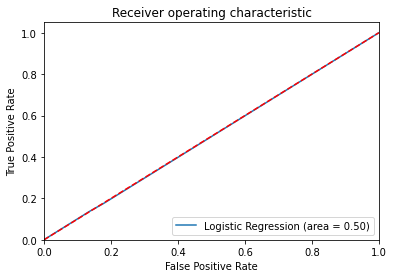



Decision Tree model: max_depth=4, splitter=best, max_feature=None
Utility score:  311.0444944758381
Accuracy:  0.5027799907057027
Confusion matrix


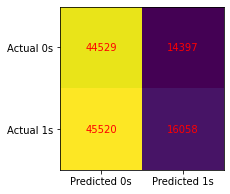

AUC_ROC


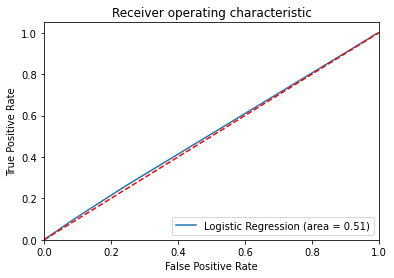



Decision Tree model: max_depth=4, splitter=best, max_feature=sqrt
Utility score:  118.98397894588487
Accuracy:  0.5074935271858195
Confusion matrix


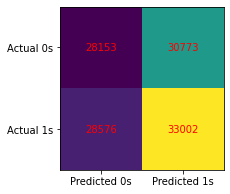

AUC_ROC


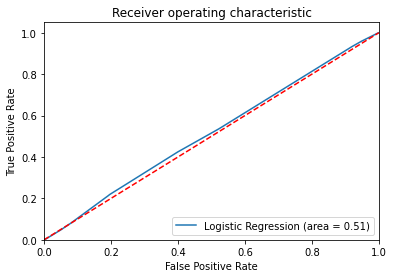



Decision Tree model: max_depth=4, splitter=best, max_feature=log2
Utility score:  165.0469614849809
Accuracy:  0.5108793069109739
Confusion matrix


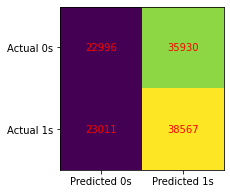

AUC_ROC


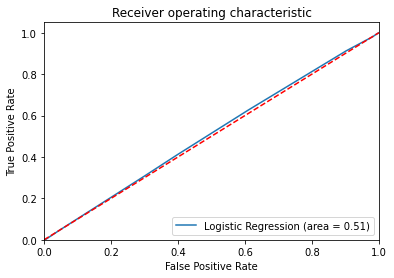



Decision Tree model: max_depth=4, splitter=random, max_feature=None
Utility score:  132.88307192493244
Accuracy:  0.5096013410343225
Confusion matrix


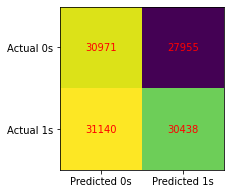

AUC_ROC


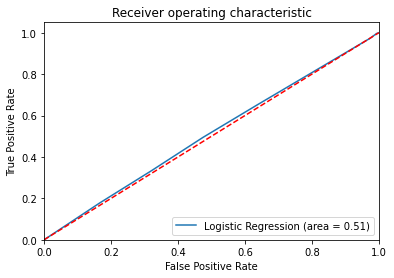



Decision Tree model: max_depth=4, splitter=random, max_feature=sqrt
Utility score:  197.48741691831503
Accuracy:  0.5135016265020248
Confusion matrix


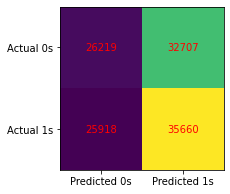

AUC_ROC


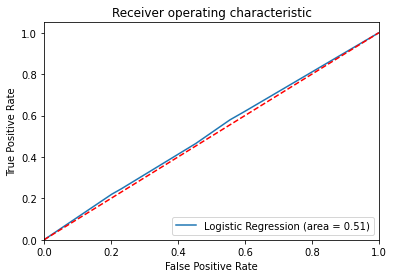



Decision Tree model: max_depth=4, splitter=random, max_feature=log2
Utility score:  225.23991025676565
Accuracy:  0.5077507800570935
Confusion matrix


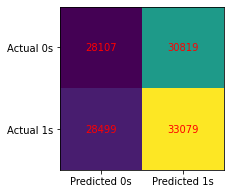

AUC_ROC


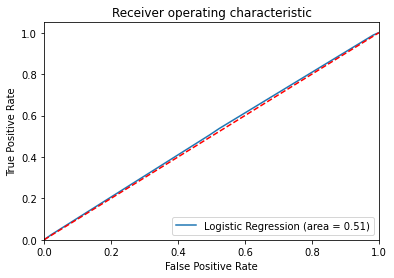



Decision Tree model: max_depth=8, splitter=best, max_feature=None
Utility score:  216.74788507170476
Accuracy:  0.5120825864701587
Confusion matrix


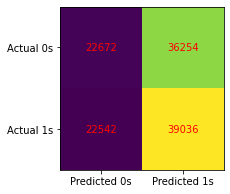

AUC_ROC


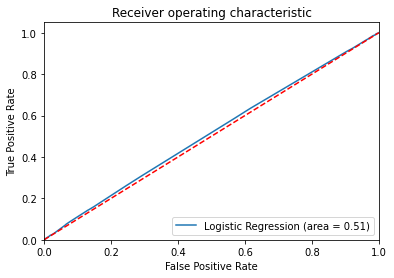



Decision Tree model: max_depth=8, splitter=best, max_feature=sqrt
Utility score:  2.7743250300640416
Accuracy:  0.5102320254929297
Confusion matrix


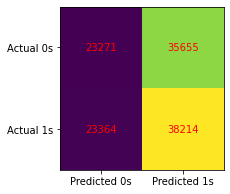

AUC_ROC


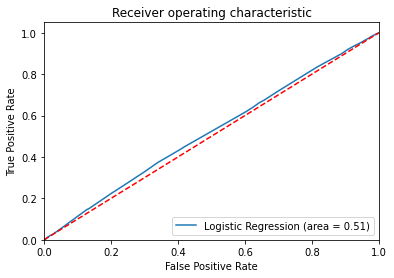



Decision Tree model: max_depth=8, splitter=best, max_feature=log2
Utility score:  124.69637299316389
Accuracy:  0.5129622253203213
Confusion matrix


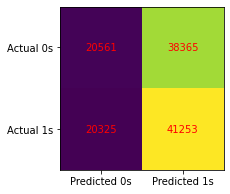

AUC_ROC


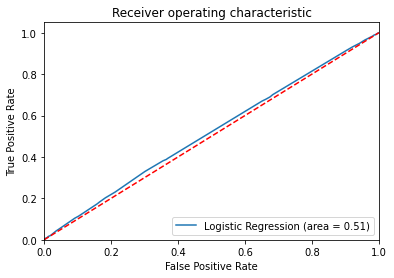



Decision Tree model: max_depth=8, splitter=random, max_feature=None
Utility score:  254.50780486891836
Accuracy:  0.5085059417114784
Confusion matrix


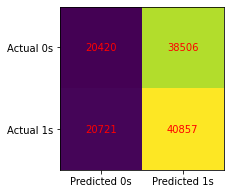

AUC_ROC


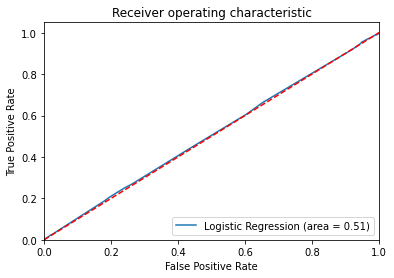



Decision Tree model: max_depth=8, splitter=random, max_feature=sqrt
Utility score:  171.58380027619236
Accuracy:  0.510945694748722
Confusion matrix


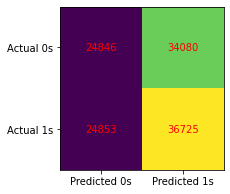

AUC_ROC


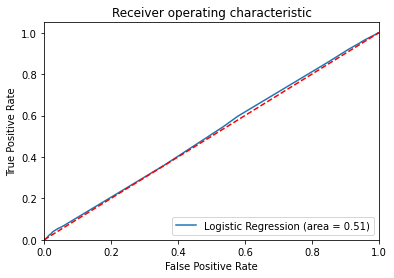



Decision Tree model: max_depth=8, splitter=random, max_feature=log2
Utility score:  459.01405686770465
Accuracy:  0.5177421496381863
Confusion matrix


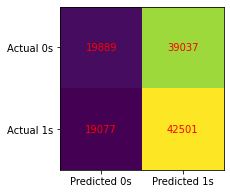

AUC_ROC


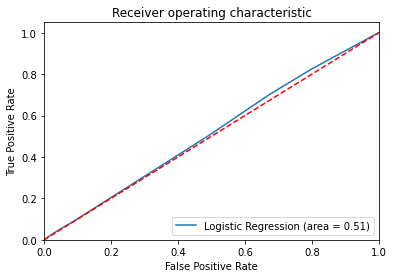



Decision Tree model: max_depth=16, splitter=best, max_feature=None
Utility score:  -0.0
Accuracy:  0.5073690499900418
Confusion matrix


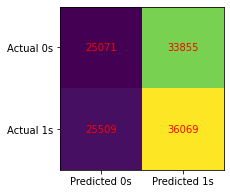

AUC_ROC


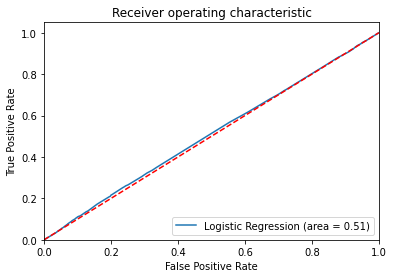



Decision Tree model: max_depth=16, splitter=best, max_feature=sqrt
Utility score:  -0.0
Accuracy:  0.5016845913828587
Confusion matrix


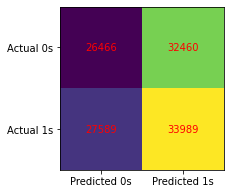

AUC_ROC


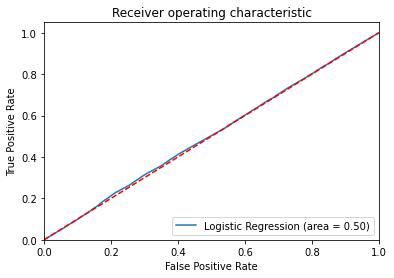



Decision Tree model: max_depth=16, splitter=best, max_feature=log2
Utility score:  190.27029477226282
Accuracy:  0.5099830711013742
Confusion matrix


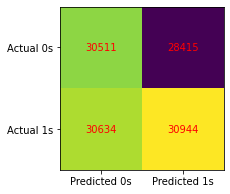

AUC_ROC


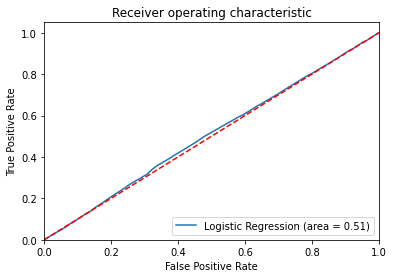



Decision Tree model: max_depth=16, splitter=random, max_feature=None
Utility score:  124.4816930600054
Accuracy:  0.5083980614751378
Confusion matrix


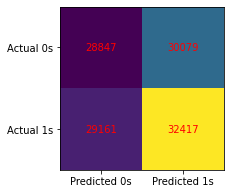

AUC_ROC


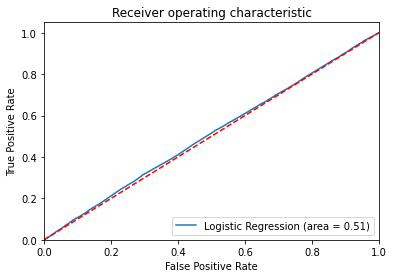



Decision Tree model: max_depth=16, splitter=random, max_feature=sqrt
Utility score:  29.543748370346556
Accuracy:  0.5102818163712408
Confusion matrix


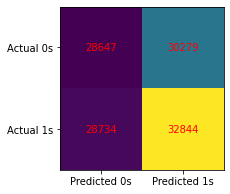

AUC_ROC


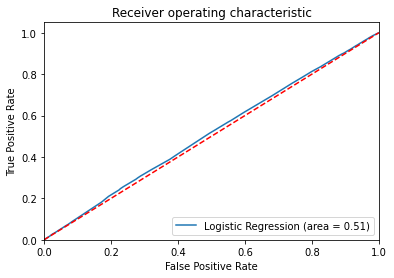



Decision Tree model: max_depth=16, splitter=random, max_feature=log2
Utility score:  11.438949616805662
Accuracy:  0.5110286795459071
Confusion matrix


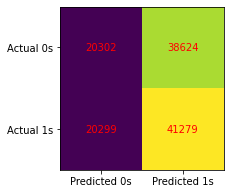

AUC_ROC


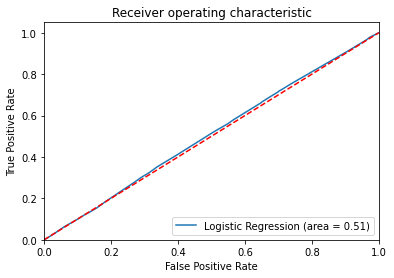



Decision Tree model: max_depth=32, splitter=best, max_feature=None
Utility score:  -0.0
Accuracy:  0.5036845249950209
Confusion matrix


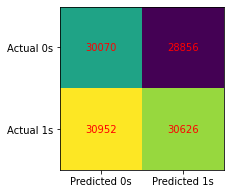

AUC_ROC


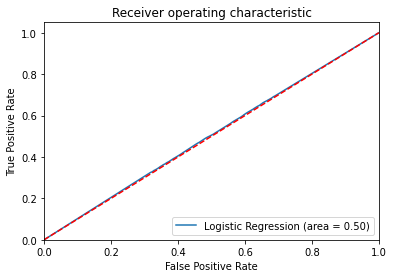



Decision Tree model: max_depth=32, splitter=best, max_feature=sqrt
Utility score:  -0.0
Accuracy:  0.49991701520281484
Confusion matrix


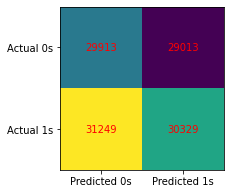

AUC_ROC


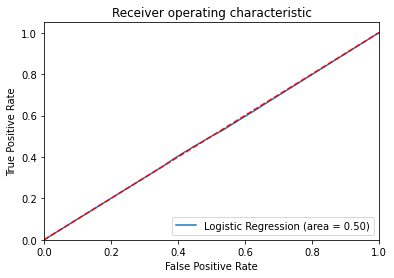



Decision Tree model: max_depth=32, splitter=best, max_feature=log2
Utility score:  0.5166151628737791
Accuracy:  0.5005642966208591
Confusion matrix


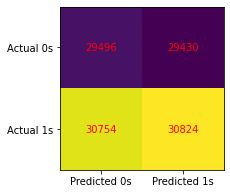

AUC_ROC


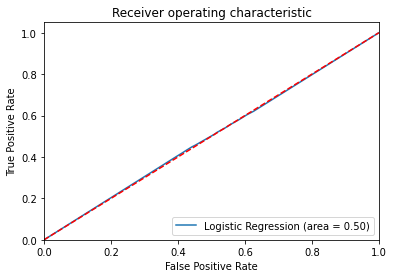



Decision Tree model: max_depth=32, splitter=random, max_feature=None
Utility score:  -0.0
Accuracy:  0.5000414923985925
Confusion matrix


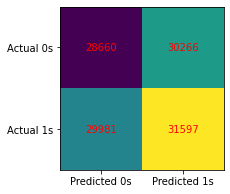

AUC_ROC


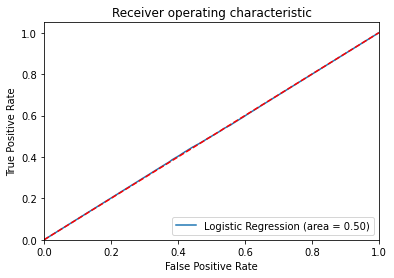



Decision Tree model: max_depth=32, splitter=random, max_feature=sqrt
Utility score:  5.112715289516198
Accuracy:  0.5056512646883091
Confusion matrix


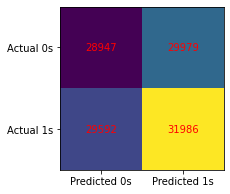

AUC_ROC


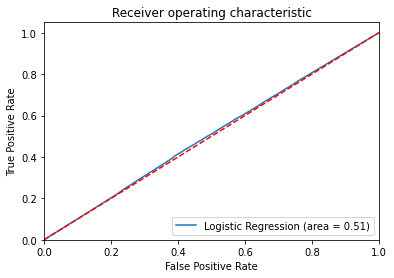



Decision Tree model: max_depth=32, splitter=random, max_feature=log2
Utility score:  56.3059003959703
Accuracy:  0.5057923388435238
Confusion matrix


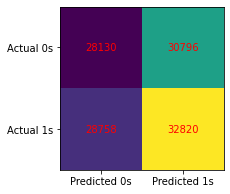

AUC_ROC


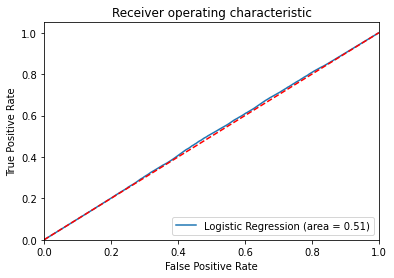



Decision Tree model: max_depth=64, splitter=best, max_feature=None
Utility score:  -0.0
Accuracy:  0.5062404567483237
Confusion matrix


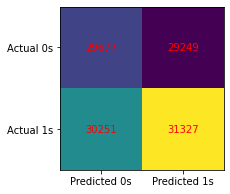

AUC_ROC


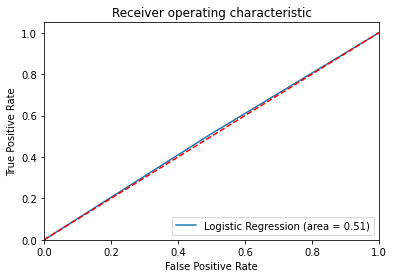



Decision Tree model: max_depth=64, splitter=best, max_feature=sqrt
Utility score:  -0.0
Accuracy:  0.5020912168890659
Confusion matrix


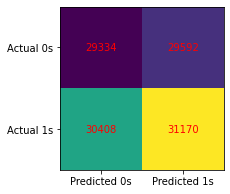

AUC_ROC


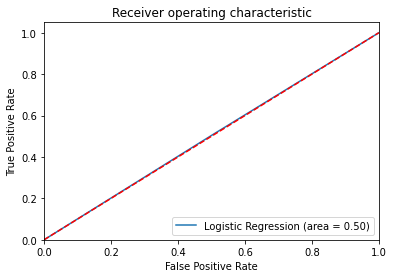



Decision Tree model: max_depth=64, splitter=best, max_feature=log2
Utility score:  12.437736473418381
Accuracy:  0.5027467967868287
Confusion matrix


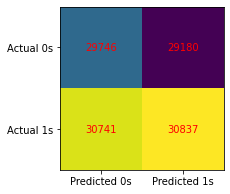

AUC_ROC


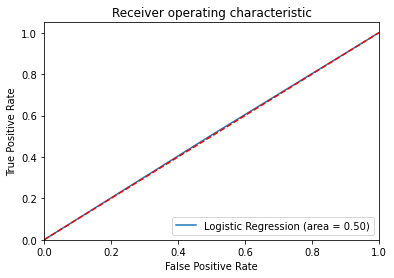



Decision Tree model: max_depth=64, splitter=random, max_feature=None
Utility score:  0.7611976255070381
Accuracy:  0.5029791542189471
Confusion matrix


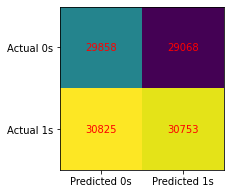

AUC_ROC


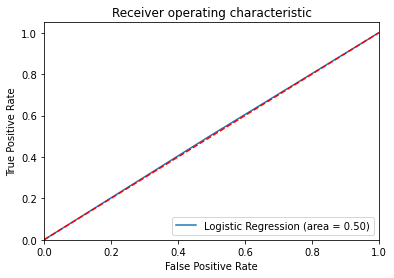



Decision Tree model: max_depth=64, splitter=random, max_feature=sqrt
Utility score:  2.940881162462966
Accuracy:  0.5028712739826063
Confusion matrix


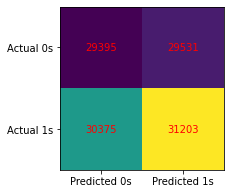

AUC_ROC


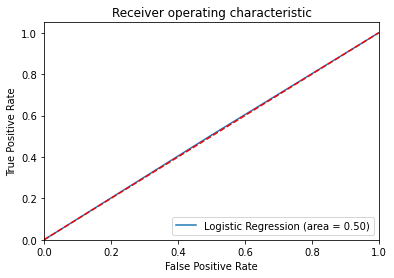



Decision Tree model: max_depth=64, splitter=random, max_feature=log2
Utility score:  -0.0
Accuracy:  0.5014273385115847
Confusion matrix


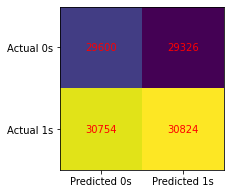

AUC_ROC


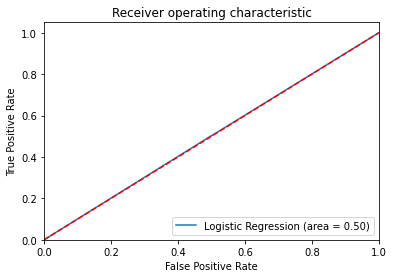

In [ ]:
# iterate over settings for the model
for max_depth in max_depths:
  for splitter in splitters:
    for max_feature in max_features:
      print(f"\n\nDecision Tree model: max_depth={max_depth}, splitter={splitter}, max_feature={max_feature}")    

      model = DecisionTreeClassifier(
          max_depth=max_depth, 
          splitter=splitter,
          max_features=max_feature
      )

      model.fit(x_train, y_train)
      model_scores(model)
      # tree.plot_tree(model)


# Conclusion

Best model for baseline decision tree with params max_depth = 8, splitter = random, max_feature = log2

* Utility score: 459.0140569
* Accuracy: 0.5177421496

Worth noting that many variations of models actually achieve a utility score of 0, with no particular pattern observed.